In [62]:
import pandas as pd
import numpy as np


df = pd.read_json("../data/example00593.json", orient='series')
df = df.set_index('date')
df = df.loc['2020-01-01':'2021-12-31']

df

,open,high,low,close,volume
date,,,,,
2020-01-02,55500,56000,55000,55200,12993228
2020-01-03,56000,56600,54900,55500,15422255
2020-01-06,54900,55600,54600,55500,10278951
2020-01-07,55700,56400,55600,55800,10009778
2020-01-08,56200,57400,55900,56800,23501171
...,...,...,...,...,...
2021-12-24,80200,80800,80200,80500,12086380
2021-12-27,80600,80600,79800,80200,10783368
2021-12-28,80200,80400,79700,80300,18226325


In [63]:
s_data_signal = pd.DataFrame(index=df.index)

s_data_signal['price'] = df['close']

s_data_signal['daily_difference'] = s_data_signal['price'].diff()

s_data_signal 

,price,daily_difference
date,,
2020-01-02,55200,NaN
2020-01-03,55500,300.0
2020-01-06,55500,0.0
2020-01-07,55800,300.0
2020-01-08,56800,1000.0
...,...,...
2021-12-24,80500,600.0
2021-12-27,80200,-300.0
2021-12-28,80300,100.0


In [64]:
s_data_signal['signal'] = 0.0
s_data_signal['signal'] = np.where(s_data_signal['daily_difference'] > 0, 1.0, 0.0)
s_data_signal

,price,daily_difference,signal
date,,,
2020-01-02,55200,NaN,0.0
2020-01-03,55500,300.0,1.0
2020-01-06,55500,0.0,0.0
2020-01-07,55800,300.0,1.0
2020-01-08,56800,1000.0,1.0
...,...,...,...
2021-12-24,80500,600.0,1.0
2021-12-27,80200,-300.0,0.0
2021-12-28,80300,100.0,1.0


In [65]:
s_data_signal['positions'] = s_data_signal['signal'].diff()
s_data_signal

,price,daily_difference,signal,positions
date,,,,
2020-01-02,55200,NaN,0.0,NaN
2020-01-03,55500,300.0,1.0,1.0
2020-01-06,55500,0.0,0.0,-1.0
2020-01-07,55800,300.0,1.0,1.0
2020-01-08,56800,1000.0,1.0,0.0
...,...,...,...,...
2021-12-24,80500,600.0,1.0,0.0
2021-12-27,80200,-300.0,0.0,-1.0
2021-12-28,80300,100.0,1.0,1.0


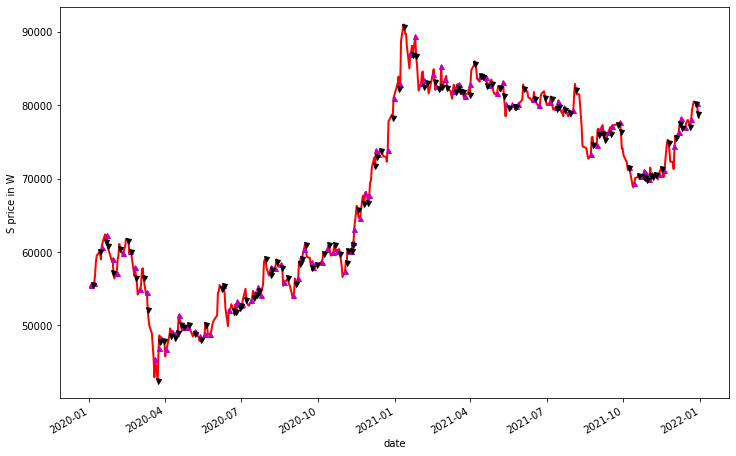

In [66]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(111, ylabel='S price in W')
                      
s_data_signal['price'].plot(ax=ax1, color='r', lw=2.)
                      
ax1.plot(s_data_signal.loc[s_data_signal.positions == 1.0].index, 
         s_data_signal.price[s_data_signal.positions == 1.0], '^', markersize= 5, color='m')
ax1.plot(s_data_signal.loc[s_data_signal.positions == -1.0].index, 
         s_data_signal.price[s_data_signal.positions == -1.0], 'v', markersize= 5, color='k')
plt.show()

## 백테스팅
- 손익(PNL) : 거래 수수료 없이 전략으로 번돈
- 순손익(순PNL) : 거래 수수료가 포함된 전략으로 번돈
- 노출(exposure) : 투자한 자금
- 트레이딩수 : 트레이딩 세션 동안 트레이딩 수
- 연간 수익률 : 1년간의 트레이딩 수익률
- 샤프비율 : 위험조정수익

In [67]:
initial_capital = float(1000000.0)

positions = pd.DataFrame(index=s_data_signal.index).fillna(0.0)
portfolio = pd.DataFrame(index=s_data_signal.index).fillna(0.0)

positions['S'] = s_data_signal['signal']

portfolio['positions'] = (positions.multiply(s_data_signal['price'], axis=0))

portfolio['cash'] = initial_capital - (positions.diff().multiply(s_data_signal['price'], axis=0)).cumsum()

portfolio['total'] = portfolio['positions'] + portfolio['cash']

In [68]:
portfolio

,positions,cash,total
date,,,
2020-01-02,0.0,NaN,NaN
2020-01-03,55500.0,944500.0,1000000.0
2020-01-06,0.0,1000000.0,1000000.0
2020-01-07,55800.0,944200.0,1000000.0
2020-01-08,56800.0,944200.0,1001000.0
...,...,...,...
2021-12-24,80500.0,953650.0,1034150.0
2021-12-27,0.0,1033850.0,1033850.0
2021-12-28,80300.0,953550.0,1033850.0


(1000000.0, 1500000.0)

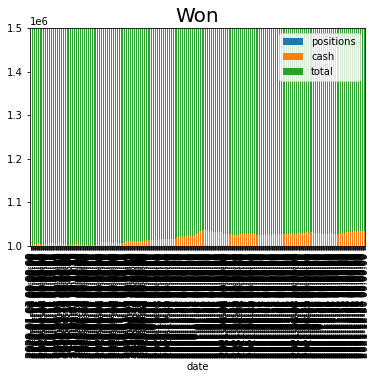

In [89]:
#fig, ax = portfolio.plot.bar(stacked=True)
ax = portfolio.plot.bar(stacked=True)
ax.set_title('Won', fontsize=20)
ax.set_ylim(1000000,1500000)
#ax.set_xticklabels(['2020-01-02','2020-06-01','2021-01-02', '2021-06-01'], rotation=0)